<a href="https://colab.research.google.com/github/kimdfarm/2025-1-myclass-BDA/blob/main/inclass/05w_B_tue_0402_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#05주차 수업

In [1]:
import numpy as np
import pandas as pd



In [27]:
df_raw = pd.DataFrame({'var1':[1,2,1],'var2':[2,3,2] , 'var3':[10,20,30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [15]:
df_new  = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [10]:
id(df_new) ==id(df_raw)

False

In [16]:
df_new.rename(columns={'var2':'va2'},inplace=True)
df_new

,var1,va2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [17]:
df_new.rename(index={0:'x', 1:'y',2:'z'},inplace=True)
df_new

,var1,va2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [22]:
df = pd.DataFrame({'A':[1,2,3],'B':[4,5,6]})
df.rename(columns={'A':'a','B':'c'},inplace=True)
df

,a,c
0,1,4
1,2,5
2,3,6


# 파생변수 생성

In [23]:
df = pd.DataFrame({'var1':[4,3,8],'var2':[2,6,1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [24]:
df1 = df.copy()

In [25]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [26]:
df1['var_mean'] = (df1['var1'] + df1['var2']) / 2
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [28]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [30]:
df2.sum()

,0
var1,15
var2,9


In [31]:
df2.sum(axis=0)

,0
var1,15
var2,9


In [32]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [33]:
df2['var_sum'] = df2.sum(axis=1)
df2

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [34]:
df2['var_sum'] = df2.sum(axis='columns')
df2

,var1,var2,var_sum
0,4,2,12
1,3,6,18
2,8,1,18


In [36]:
df2[['var1' , 'var2']]

,var1,var2
0,4,2
1,3,6
2,8,1


In [37]:
df2[['var1' , 'var2']].mean()


,0
var1,5.0
var2,3.0


In [38]:
df2[['var1' , 'var2']].mean(axis=1)

,0
0,3.0
1,4.5
2,4.5


In [39]:
df2['var_mean'] = df2[['var1' , 'var2']].mean(axis=1)
df2

,var1,var2,var_sum,var_mean
0,4,2,12,3.0
1,3,6,18,4.5
2,8,1,18,4.5


In [40]:
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [42]:
df1['var_mean'] = df1[['var1' , 'var2']].mean(axis=1)
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


#mpg 연비 변수 생성

In [43]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 3.92 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [44]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [45]:
mpg.sample()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan


In [47]:
mpg.cty+mpg.hwy

,0
0,47
1,50
2,51
3,51
4,42
...,...
229,47
230,50
231,42
232,44


In [48]:
mpg.total = (mpg.cty+mpg.hwy) / 2
mpg.head()

<ipython-input-48-1112a1a66fd1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mpg.total = (mpg.cty+mpg.hwy) / 2


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [49]:
mpg['total'] = (mpg.cty+mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [51]:
mpg['mpg_mean'] = mpg[['cty','hwy']].mean(axis='columns')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [54]:
sum(mpg.total) / len(mpg.total)

20.14957264957265

In [55]:
mpg.total.mean()

np.float64(20.14957264957265)

In [56]:
mpg['total'].mean()

np.float64(20.14957264957265)

# 조건문 활용

In [57]:
mpg.total.describe()

,0
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


<Axes: ylabel='Frequency'>

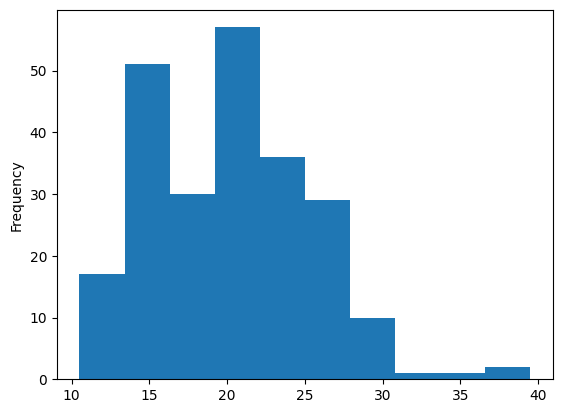

In [58]:
mpg.total.plot.hist()

In [60]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.1 MB/s eta 0:00:00


In [64]:
import koreanize_matplotlib

<Axes: title={'center': '히스토그램'}, ylabel='Frequency'>

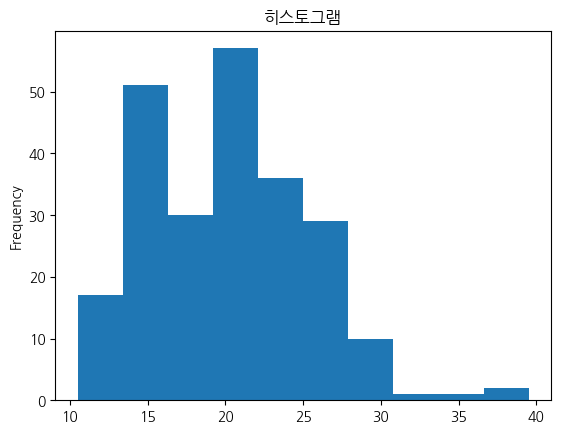

In [65]:
mpg['total'].plot(kind="hist",title="히스토그램")

<Axes: xlabel='total', ylabel='Count'>

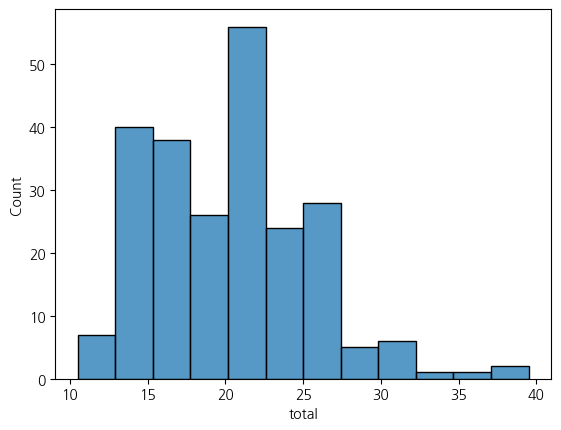

In [66]:
import seaborn as sns

sns.histplot(mpg , x="total")

In [67]:
np.where(30 >= 5, 'pass' , 'fail')

array('pass', dtype='<U4')

In [68]:
np.where(30 <= 5, 'pass' , 'fail')

array('fail', dtype='<U4')

In [69]:
np.where(mpg.total >= 30, 'pass' , 'fail')

array(['fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'pass', 'fail', 'fail', 'fail', 'fail',
       'pass', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
      

In [71]:
mpg['test'] =  np.where(mpg.total >= 20, 'pass' , 'fail')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test
77,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv,15.5,15.5,fail
79,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv,15.5,15.5,fail
149,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize,22.0,22.0,pass
96,ford,mustang,4.6,2008,8,manual(m5),r,15,23,r,subcompact,19.0,19.0,fail
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0,25.0,pass


In [72]:
mpg.test.value_counts()

,count
test,
pass,128
fail,106


In [73]:
type(mpg.test.value_counts())

pandas.core.series.Series

<Axes: xlabel='test'>

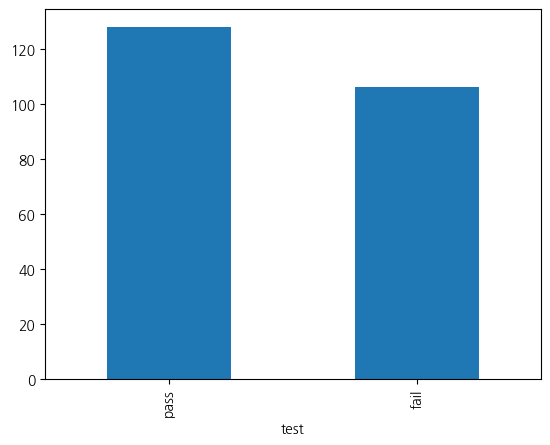

In [74]:
mpg.test.value_counts().plot.bar()

<Axes: xlabel='test'>

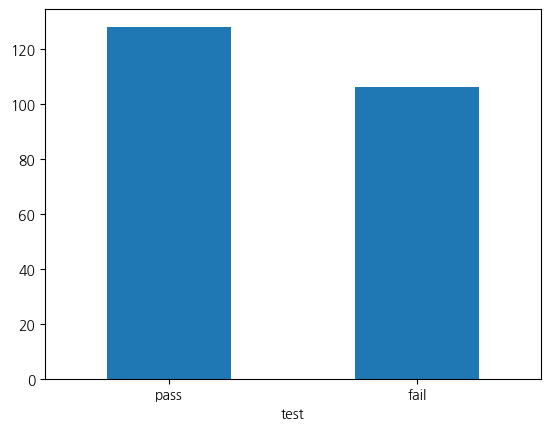

In [75]:
mpg.test.value_counts().plot.bar(rot=0)


<Axes: ylabel='count'>

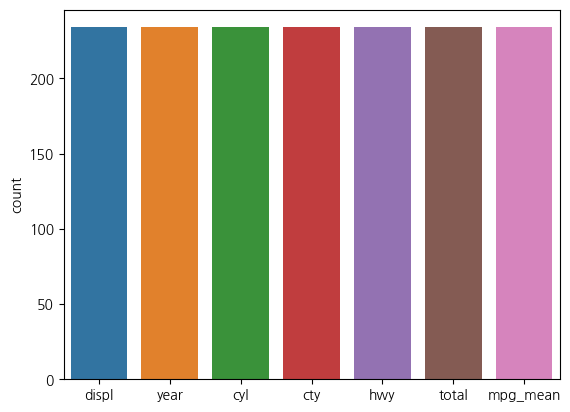

In [78]:
sns.countplot(mpg)

<Axes: xlabel='test', ylabel='count'>

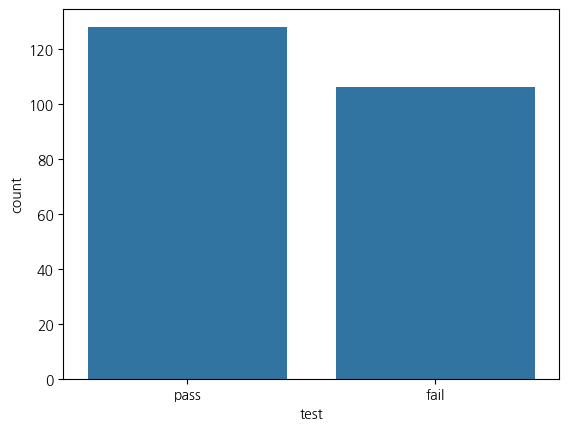

In [80]:
sns.countplot(mpg,  x= 'test')

<Axes: xlabel='test', ylabel='count'>

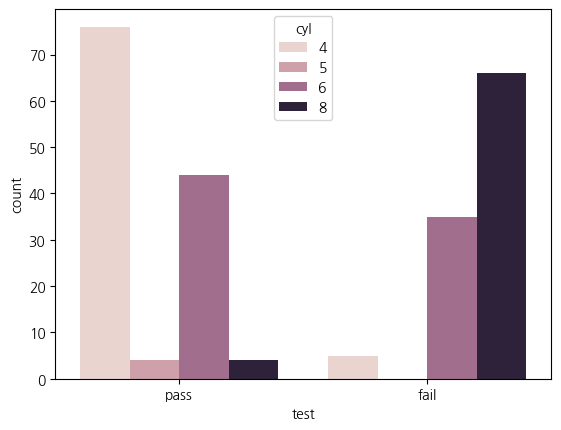

In [83]:
sns.countplot(mpg,  x= 'test' ,hue='cyl')

<Axes: xlabel='test', ylabel='percent'>

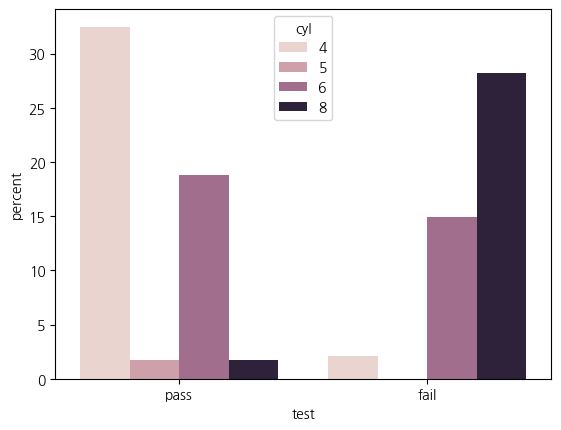

In [84]:
sns.countplot(mpg,  x= 'test' ,hue='cyl', stat='percent')


<Axes: xlabel='test', ylabel='percent'>

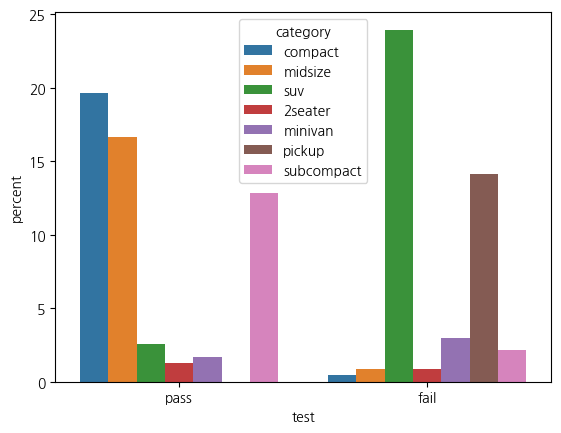

In [85]:
sns.countplot(mpg,  x= 'test' ,hue='category', stat='percent')


In [87]:
np.where(mpg.total >= 30, 'A' ,np.where(mpg.total >= 20, 'B' , 'C'))

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'B',
       'B', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'C', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B',
       'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'B', 'B', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B

In [88]:
mpg['grade'] = np.where(mpg.total >= 30, 'A' ,np.where(mpg.total >= 20, 'B' , 'C'))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5,10.5,fail,C
139,mercury,mountaineer 4wd,4.6,2008,8,auto(l6),4,13,19,r,suv,16.0,16.0,fail,C
55,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup,14.0,14.0,fail,C
45,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,21,r,minivan,18.0,18.0,fail,C
153,nissan,pathfinder 4wd,5.6,2008,8,auto(s5),4,12,18,p,suv,15.0,15.0,fail,C


In [90]:
n_grade =  mpg.grade.value_counts()
n_grade

,count
grade,
B,118
C,106
A,10


<Axes: xlabel='grade'>

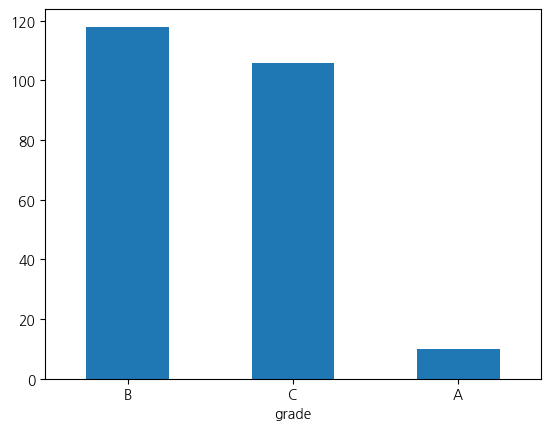

In [91]:
n_grade.plot.bar(rot=0)

In [92]:
n_grade =  mpg.grade.value_counts().sort_index()
n_grade

,count
grade,
A,10
B,118
C,106


<Axes: xlabel='grade'>

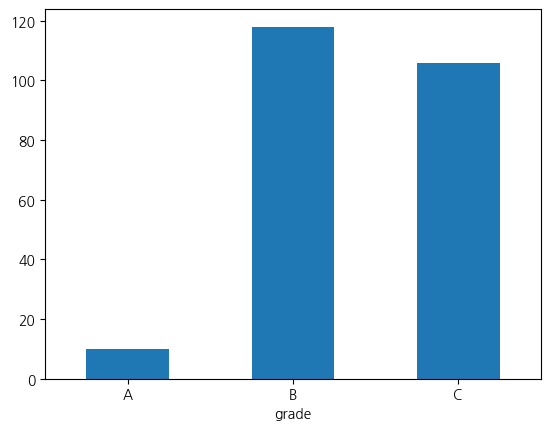

In [93]:
n_grade.plot.bar(rot=0)

<Axes: xlabel='grade', ylabel='count'>

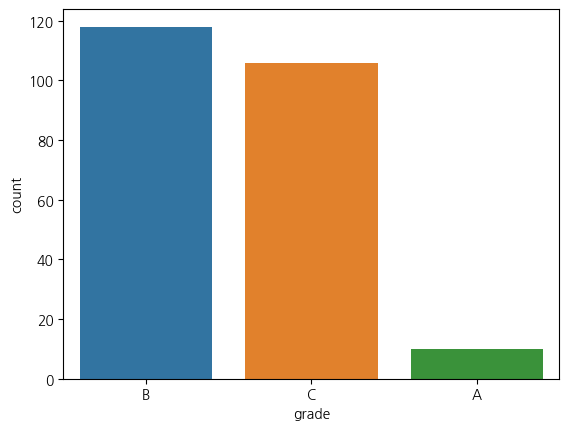

In [94]:
sns.countplot(mpg,  x= 'grade' ,hue='grade')

<Axes: xlabel='grade', ylabel='percent'>

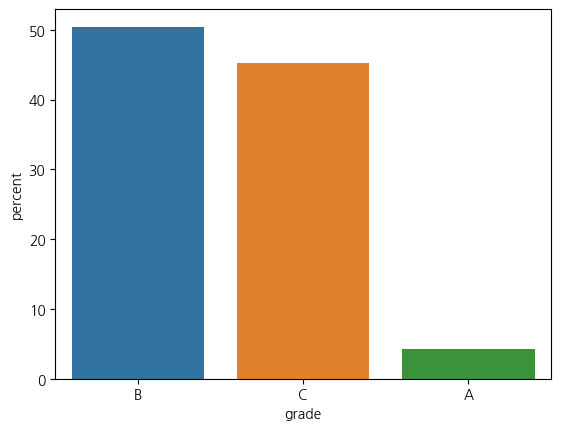

In [95]:
sns.countplot(mpg,  x= 'grade' ,hue='grade', stat='percent')

In [98]:
mpg.grade.value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

<Axes: xlabel='grade', ylabel='percent'>

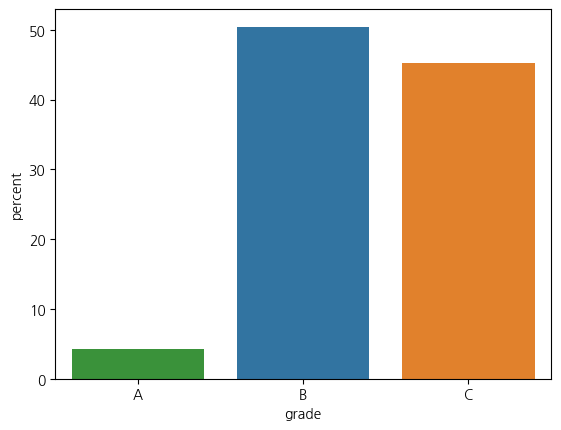

In [99]:
sns.countplot(mpg,  x= 'grade' ,hue='grade', stat='percent', order=mpg.grade.value_counts().sort_index().index)

<Axes: xlabel='grade', ylabel='percent'>

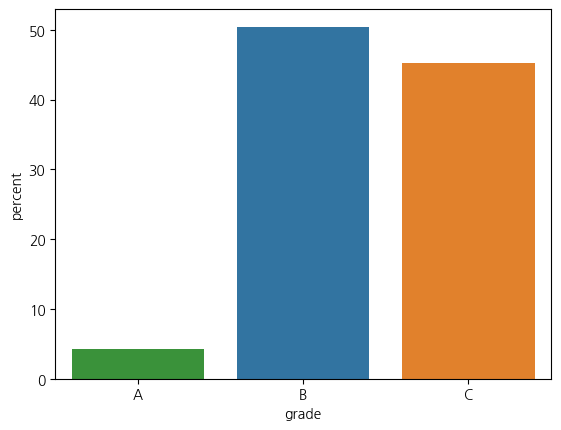

In [100]:
sns.countplot(mpg,  x= 'grade' ,hue='grade', stat='percent', order=['A','B','C'])

In [101]:
mpg.grade.unique()

array(['B', 'C', 'A'], dtype=object)

In [102]:
np.sort(mpg.grade.unique())

array(['A', 'B', 'C'], dtype=object)

<Axes: xlabel='grade', ylabel='percent'>

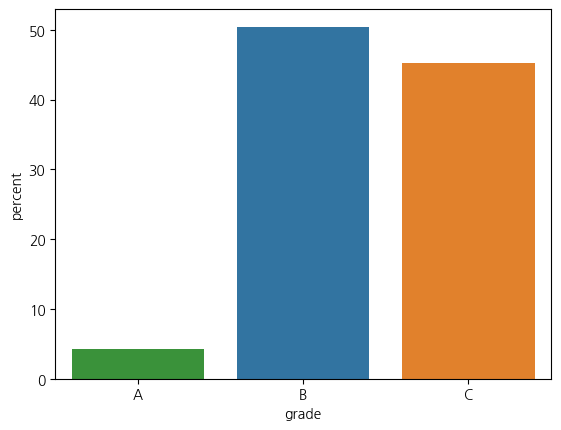

In [103]:
sns.countplot(mpg,  x= 'grade' ,hue='grade', stat='percent', order=np.sort(mpg.grade.unique()))


#메소드 체이닝

In [104]:
mpg.grade.value_counts().sort_index()

,count
grade,
A,10
B,118
C,106


In [106]:
d= mpg.grade.value_counts().sort_index()
d

,count
grade,
A,10
B,118
C,106


In [108]:
mpg.grade.value_counts().sort_index(ascending=False)


,count
grade,
C,106
B,118
A,10


In [112]:
mpg['grade'] = np.where(mpg.total >= 30, 'A'  ,np.where(mpg.total >= 25, 'B'   ,np.where(mpg.total >= 20,'C','D'  )))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,20.0,20.0,pass,C
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact,20.0,20.0,pass,C
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5,10.5,fail,D
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0,25.0,pass,B
17,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize,19.5,19.5,fail,D


In [110]:
mpg['grade'] = np.where(mpg.total >= 30, 'A'
                        ,np.where(mpg.total >= 25, 'B'
                        ,np.where(mpg.total >= 20,'C','D'  )))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
135,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,16,p,suv,13.5,13.5,fail,D
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,19.0,19.0,fail,D
13,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact,21.0,21.0,pass,C
134,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv,14.0,14.0,fail,D
150,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv,15.5,15.5,fail,D


# 연산자 |(or) 메소드 isin

In [117]:
mpg['size']= np.where((mpg.category =='compact') |
                      (mpg.category =='subcompact') |
                      (mpg.category =='2seater') ,'small' , 'large')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade,size
112,hyundai,sonata,2.5,1999,6,auto(l4),f,18,26,r,midsize,22.0,22.0,pass,C,large
31,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,15.5,fail,D,large
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0,22.0,pass,C,small
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup,14.0,14.0,fail,D,large
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,23.0,23.0,pass,C,small


In [118]:
mpg['size'].value_counts()

,count
size,
large,147
small,87


In [119]:
mpg['size']= np.where(mpg.category.isin(['compact','subcompact','2seater'])
,'small' , 'large')
mpg['size'].value_counts()

,count
size,
large,147
small,87


# 정리하기

In [120]:
#2 패키지 로드
mpg = pd.read_csv('data/mpg.csv')

#3 데이터 파악하기

mpg.shape   #행, 열 수
mpg.head()  #데이터 앞부분
mpg.tail()  #데이터 일부분
mpg.info()  #속성
mpg.describe()#요약 통계량

#4 변수명 바꾸기
mpg.rename(columns={'cty':'city'})

#5 파생변수 만들기
mpg['total'] = (mpg.cty+mpg.hwy) / 2
mpg['mpg_mean'] = mpg[['cty','hwy']].mean(axis=1)
mpg['test'] = np.where(mpg.total >= 20, 'pass' , 'fail')

#6 빈도 확인하기
count_test = mpg['test'].value_counts()
count_test.plot.bar(rot=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


# 단원 06

In [122]:
import numpy as np
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(5)

,id,nclass,math,english,science
19,20,5,78,83,58
4,5,2,25,80,65
15,16,4,58,98,65
1,2,1,60,97,60
11,12,3,45,85,32


In [123]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [127]:
exam.sample(6)

,id,nclass,math,english,science
13,14,4,48,87,12
3,4,1,30,98,58
16,17,5,65,68,98
5,6,2,50,89,98
1,2,1,60,97,60
19,20,5,78,83,58


In [128]:
exam.sample(frac=.2)

,id,nclass,math,english,science
15,16,4,58,98,65
6,7,2,80,90,45
3,4,1,30,98,58
4,5,2,25,80,65


In [129]:
exam.info

<bound method DataFrame.info of     id  nclass  math  english  science
0    1       1    50       98       50
1    2       1    60       97       60
2    3       1    45       86       78
3    4       1    30       98       58
4    5       2    25       80       65
5    6       2    50       89       98
6    7       2    80       90       45
7    8       2    90       78       25
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32
12  13       4    46       98       65
13  14       4    48       87       12
14  15       4    75       56       78
15  16       4    58       98       65
16  17       5    65       68       98
17  18       5    80       78       90
18  19       5    89       68       87
19  20       5    78       83       58>

In [130]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [131]:
exam.query('nclass == 2')


,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [132]:
exam.query('nclass != 2')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
